In [1]:
import cv2
import re
import pytesseract
from typing import OrderedDict
from glob import glob
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (30, 30)
plt.rcParams['image.cmap'] = 'gray'

In [2]:
files=glob("/home/vimalkumar/Documents/redact_project/pdf/signed/1012.jpeg")
print(files)

['/home/vimalkumar/Documents/redact_project/pdf/signed/1012.jpeg']


In [3]:
data_dict_dob=OrderedDict({
    "No:":{"label":"No:",'Zoning_type':'inline'},
    "Account":{"label":"Account",'Zoning_type':'inline'}
})

['', '', '', '', 'FORWARD', 'FINANCING', 'LLC', 'AUTHORIZATION', 'AGREEMENT', 'FOR', '', '', 'DIRECT', 'DEPOSITS', '(ACH', 'CREDITS)', 'AND', '', '', 'DIRECT', 'PAYMENTS', '(ACH', 'DEBITS)', '', 'This', 'Authorization', 'Agreement', 'for', 'Direct', 'Deposits', '(ACH', 'Credits)', 'and', 'Direct', 'Payments', '(ACH', 'Debits)', '(the', '“Authorization’)', 'is', 'part', 'of', '(and', 'incorporated', '', 'by', 'reference', 'into)', 'the', 'Future', 'Receipts', 'Sale', 'Agreement', '(the', '“Agreement”).', 'Customer', 'should', 'keep', 'this', 'important', 'legal', 'document', 'for', "Customer's", '', 'records.', 'All', 'capitalized', 'terms', 'used', 'in', 'this', 'Authorization', 'shall', 'have', 'the', 'same', 'meaning', 'assigned', 'to', 'such', 'terms', 'in', 'the', 'Agreement', 'unless', 'otherwise', 'noted', '', 'herein.', '', 'DISBURSEMENT', 'OF', 'PURCHASE', 'PRICE', 'AND', 'OTHER', 'AMOUNTS', 'OWED', 'TO', 'CUSTOMER.', 'By', 'signing', 'below,', 'Customer', 'authorizes', 'Purcha

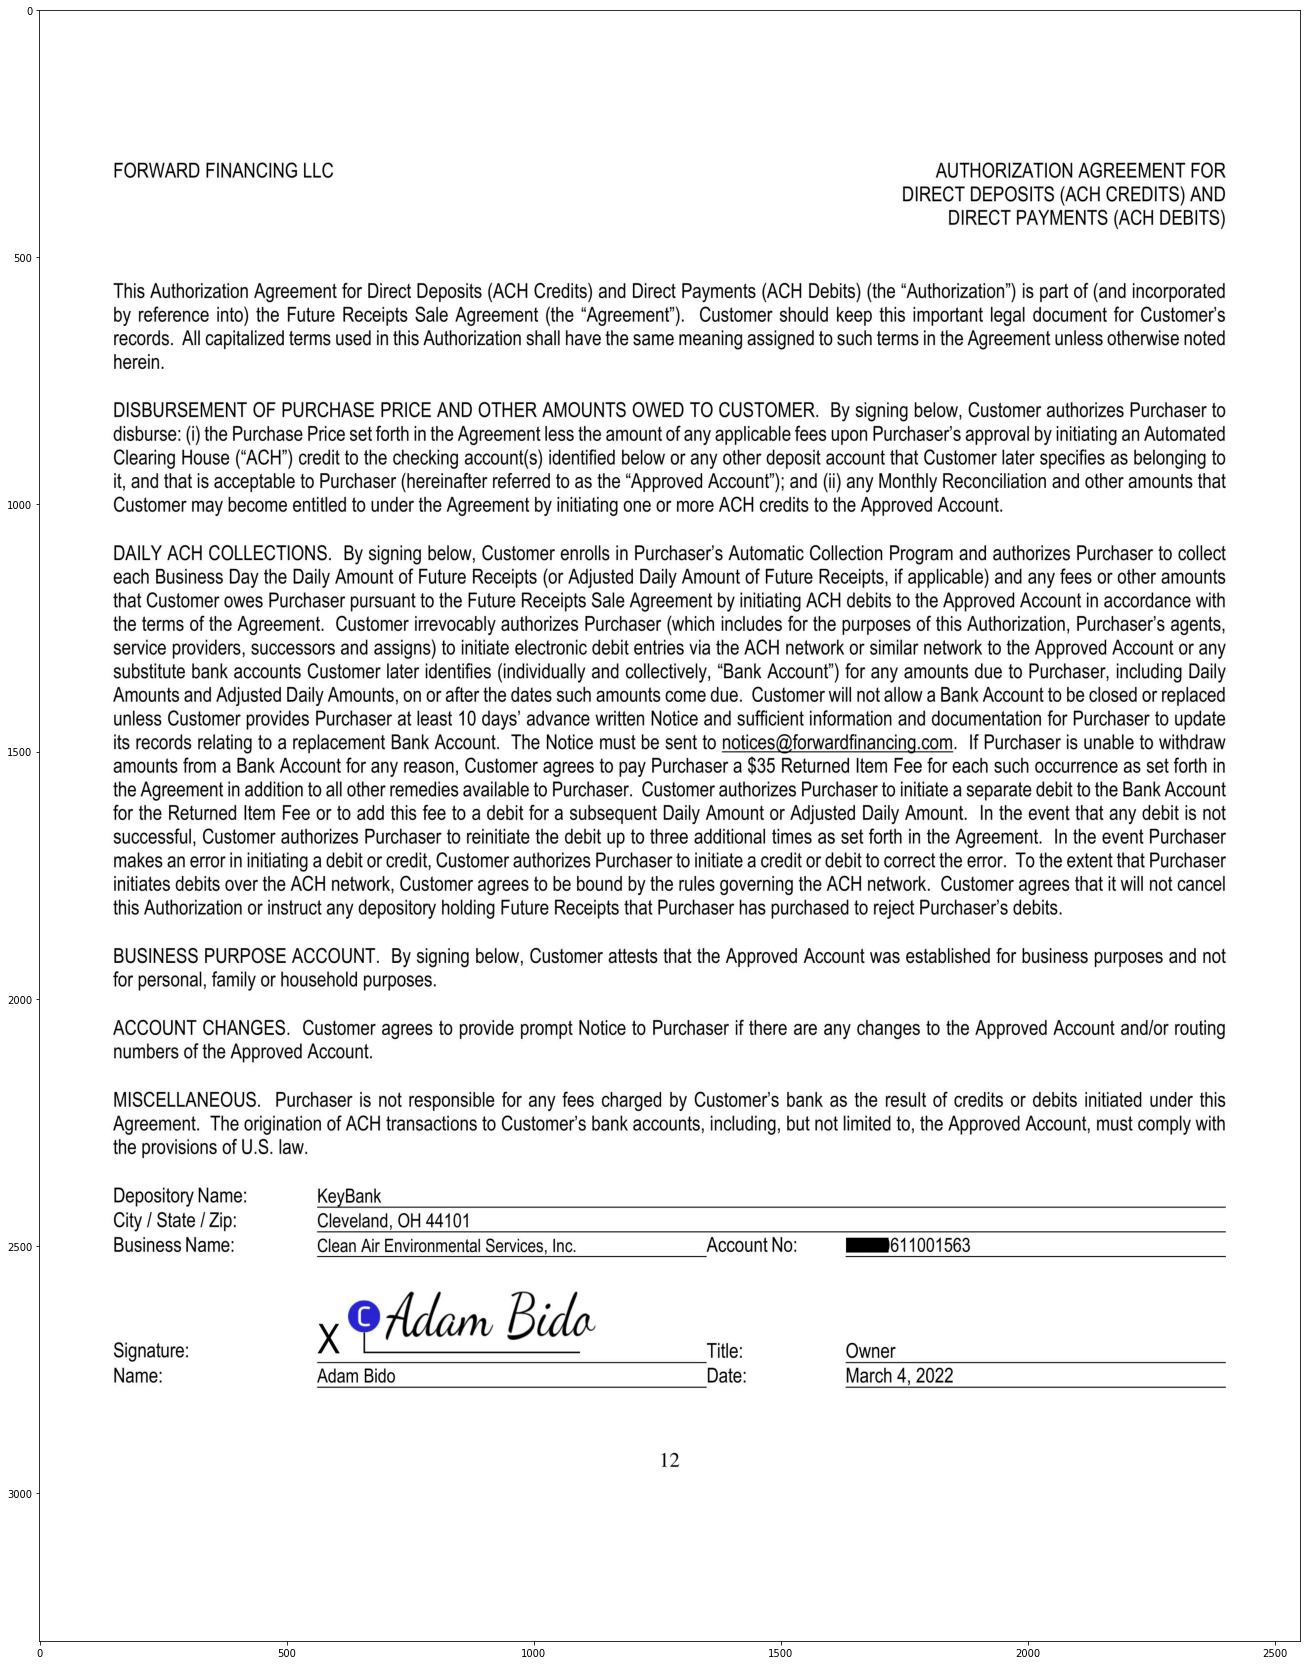

In [6]:
for file in files:
    image=cv2.imread(file)
    image_w=cv2.imread(file)
    image_data=pytesseract.image_to_data(image,config="--psm 6",output_type=pytesseract.Output.DICT)
    print(image_data["text"])
#     plt.imshow(image)
    tem_string_inline_net=""
    tem_string_bottom_net=""
    result_inline=[]
    for key in data_dict_dob.keys():
        to_find=data_dict_dob[key]["label"].lower()
        for i in range(len(image_data["text"])):
            if to_find in image_data["text"][i].lower():
                x,y,w,h=image_data["left"][i],image_data["top"][i],image_data["width"][i],image_data["height"][i]
                if data_dict_dob[key]["label"] == "Account":
#                     print("in")
                    zoning_area=(x-20,y-10,w+x+500,h+y+40) 
                    cv2.rectangle(image,(zoning_area[0],zoning_area[1]),(zoning_area[2],zoning_area[3]),(0,0,255),4)
#                     plt.imshow(image)
                else:
                    zoning_area=(x-20,y-10,w+x+500,h+y+40) 
                    cv2.rectangle(image,(zoning_area[0],zoning_area[1]),(zoning_area[2],zoning_area[3]),(0,0,255),4)
#                                
                for j in range(len(image_data["text"])):
                    x,y,w,h=image_data["left"][j],image_data["top"][j],image_data["width"][j],image_data["height"][j]
                    if x>=zoning_area[0] and y>=zoning_area[1] and x+w <= zoning_area[2] and y+h <= zoning_area[3]:
                        tem_string_inline_net += image_data["text"][j]+" "
                        
#     print(tem_string_inline_net)
    output_inline=re.findall(r"\d+",tem_string_inline_net)
#     print(output_inline)

    if output_inline == []:
        print("nothing to mask")
    else:
        string_final=""
        for val in output_inline[0]:
            string_final += val
        print(string_final)
        
        data_dict_fin=OrderedDict({
                "Account":{"label":string_final}
                })    
        

        for key in data_dict_fin.keys():
            to_find=data_dict_fin[key]["label"].lower()
            for fin in range(len(image_data["text"])):
                if to_find in image_data["text"][fin].lower():
                    x,y,w,h=image_data["left"][fin],image_data["top"][fin],image_data["width"][fin],image_data["height"][fin]
                    if data_dict_fin[key]["label"] == string_final and len(string_final) == 9:
                        zoning_area=(x,y,w+x-39,h+y)
                        cv2.rectangle(image_w,(zoning_area[0],zoning_area[1]),(zoning_area[2],zoning_area[3]),(0,0,0),-1)
                        plt.imshow(image_w)
                        #cv2.imwrite("/home/vijay/Documents/new redaction project/to_test/Signed Contracts 01-23-2020 - Building EdLacer/"+str(24010)+".jpeg",image_w)
                    if data_dict_fin[key]["label"] == string_final and len(string_final) != 9:
                        zoning_area=(x,y,w+x-35,h+y)
                        cv2.rectangle(image_w,(zoning_area[0],zoning_area[1]),(zoning_area[2],zoning_area[3]),(0,0,0),-1)
                        plt.imshow(image_w)
                        #cv2.imwrite("/home/vijay/Documents/new redaction project/to_test/Signed Contracts 01-23-2020 - Building EdLacer/"+str(24010)+".jpeg",image_w)
#                     if data_dict_fin[key]["label"] == string_final and len(string_final) == 8:
#                         zoning_area=(x,y,w+x-35,h+y)
#                         cv2.rectangle(image_w,(zoning_area[0],zoning_area[1]),(zoning_area[2],zoning_area[3]),(0,255,0),-1)
#                         plt.imshow(image_w)

# for multiple pdfs

In [1]:
# import os
# import fitz
# from termcolor import colored

In [6]:
# in_path = '/home/vijay/Documents/to_test_masking_new/'
# out_path = "/home/vijay/Documents/to_test_masking_new_out_path/"
# document_name= []

No of Pages :  14
/home/vijay/Documents/to_test_masking_new_out_path/Signed Contract 3.4.2022 (Funding call) - Clean Air Environmental Services.pdf/19.jpeg


TypeError: Image data of dtype object cannot be converted to float

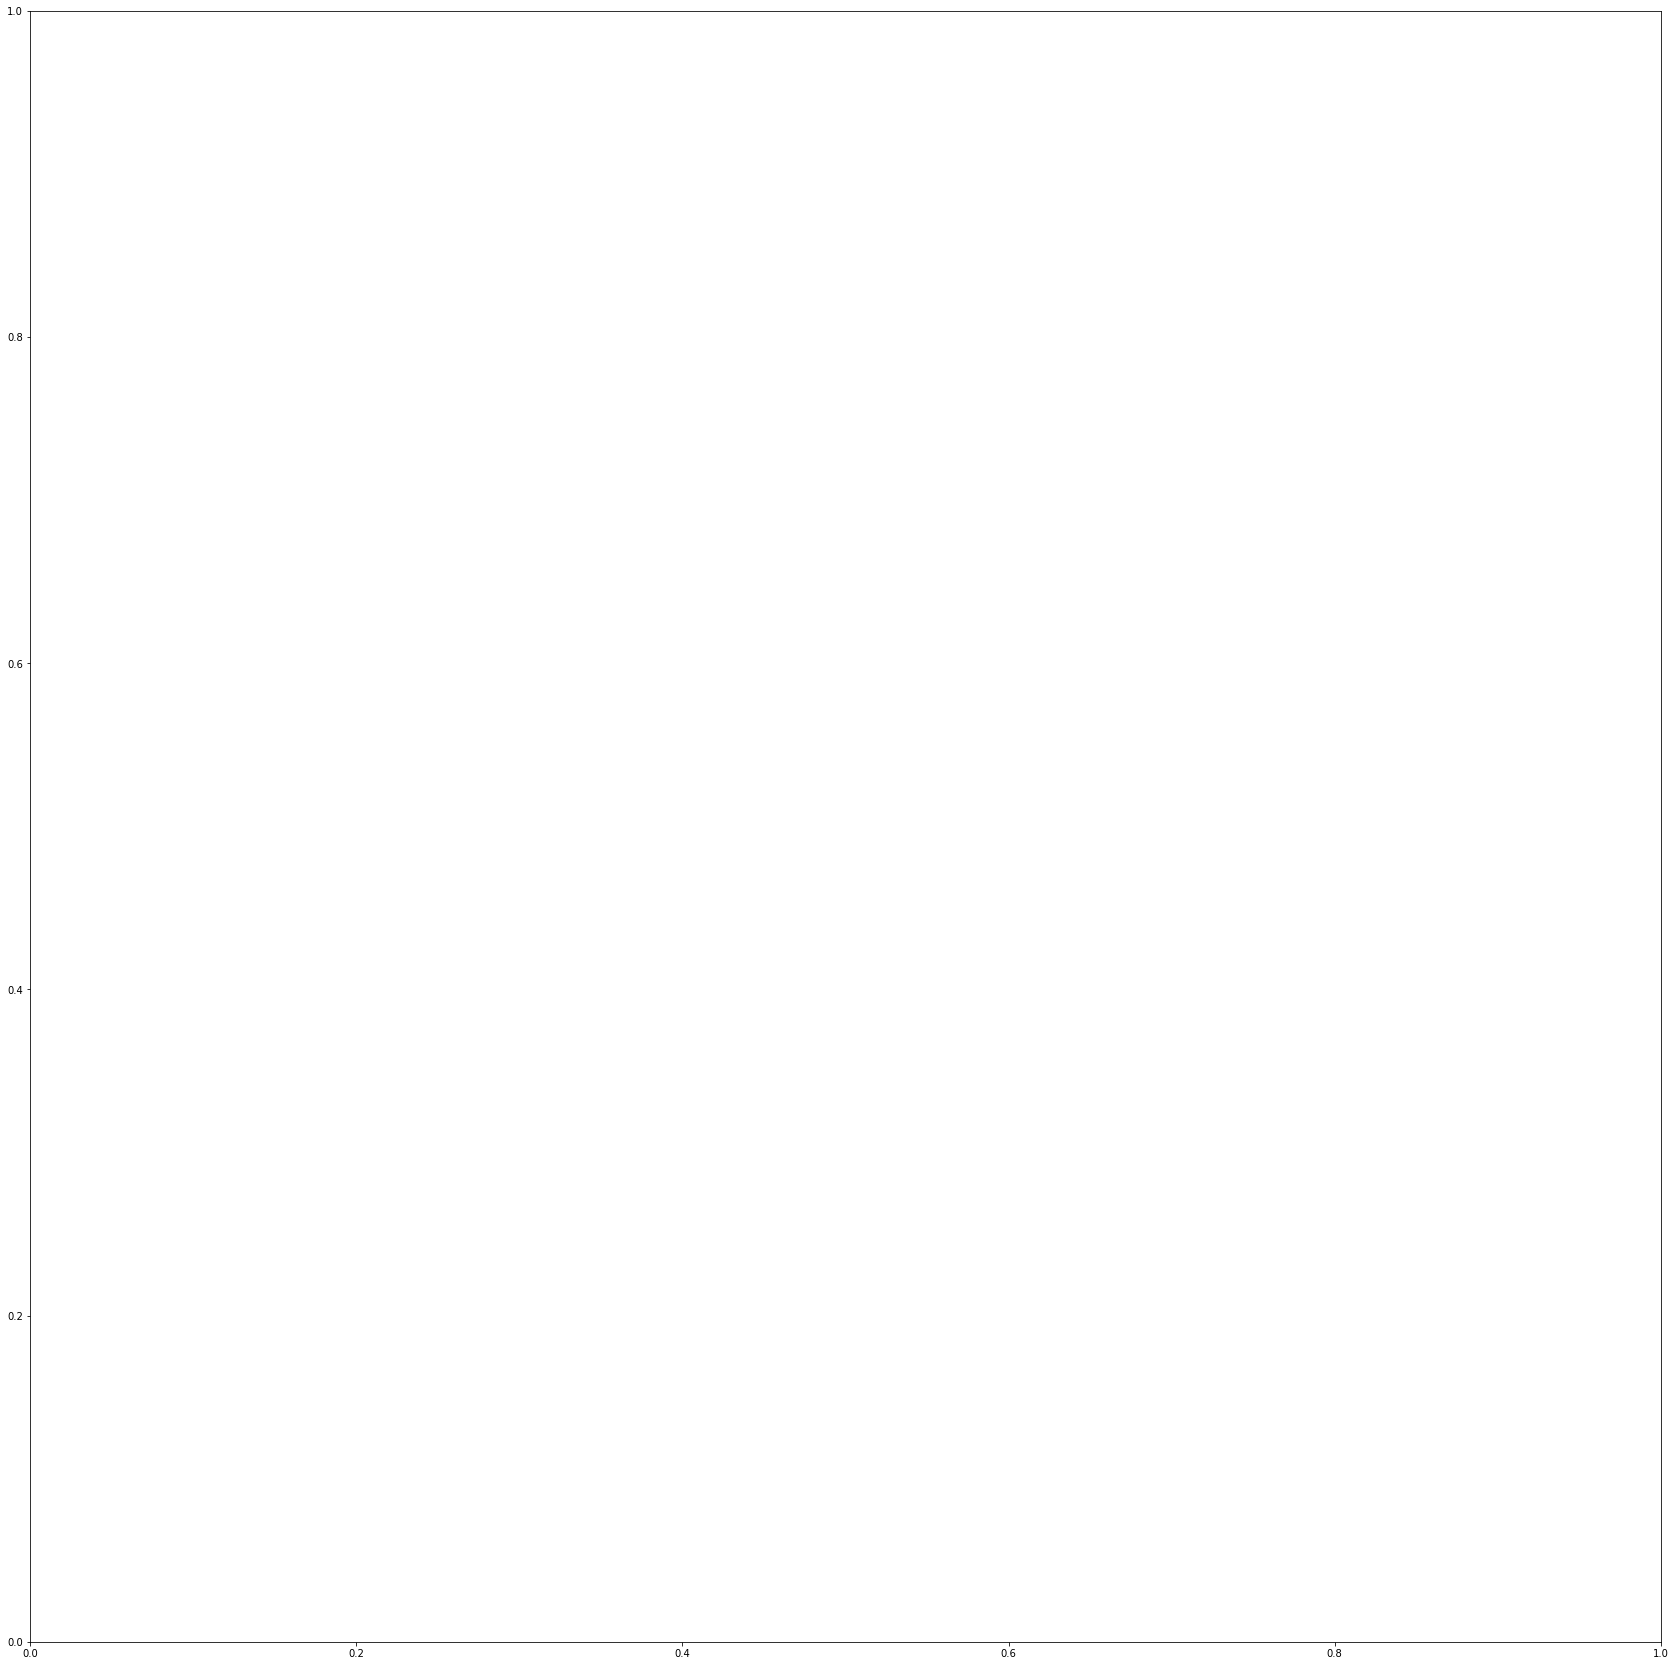

In [7]:
# for file in os.listdir(in_path):
#     document_name.append(file)
#     pdf_file_name = os.path.splitext(file)[0]
# #     print(pdf_file_name)
#     os.makedirs(os.path.join(out_path,os.path.splitext(file)[0]))
#     doc = fitz.open(os.path.join(in_path,file))
#     print(colored('No of Pages : ','green', attrs=['bold']),len(doc))
#     mat = fitz.Matrix(150 / 72, 150 / 72)
#     for k in range(len(doc)):
#         page = doc.load_page(k)  # number of page
#         pix = page.get_pixmap(matrix=mat)
#         pix.pil_save(os.path.join(out_path,os.path.splitext(file)[0],str(k+10)+'.jpeg'))
#     lst = sorted(os.listdir(os.path.join(out_path,os.path.splitext(file)[0])))
#     to_pick = os.path.join(out_path,file+"/"+"19.jpeg")
#     print(to_pick)
#     image = cv2.imread(to_pick)
#     plt.imshow(image)
# #     image_data = pytesseract.image_to_data(image,config='--psm 6',
# #                                                  output_type=pytesseract.Output.DICT)   
# #     print(image_data["text"])
# # /home/vijay/Documents/to_test_masking_new_out_path/Ceremony Salon DocuSigned Agreement - 12_2_2016
        
# #     /home/vijay/Documents/to_test_masking_new_out_path/Signed Contract 3.4.2022 (Funding call) - Clean Air Environmental Services
        
